# Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso

C = 1000000000000

%matplotlib inline

Let's start with an unseperable dataset:

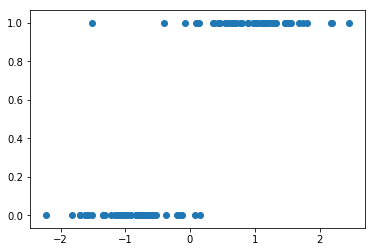

In [2]:
X, y = make_classification(n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=4)

df = pd.DataFrame(X, columns=['x'])
df['y'] = y
plt.scatter(X, y)
plt.show()

And let's shift it to also be make a separable one:

shifted the ones over by 1.66.


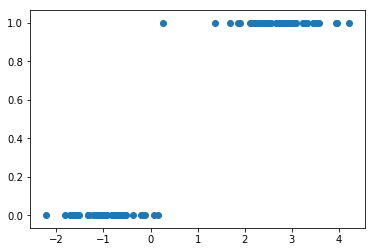

In [3]:
shift_amount = df[df['y']==0].x.max() - df[df['y']==1].x.min()
print("shifted the ones over by {}.".format(round(shift_amount,2)))

def shift_ones(row):
    if row['y'] == 1:
        return row['x'] + shift_amount + 0.1
    else: 
        return row['x']
    
# Notice, you can use `apply` to as a supped-up version of a Series object's `map`.
df['x2'] = df.apply(shift_ones, axis=1)
plt.scatter(df['x2'], y)
plt.show()

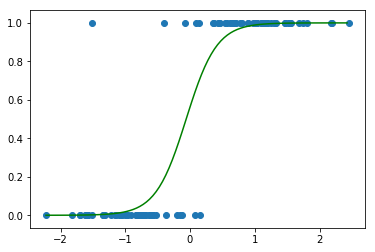

In [4]:
model_unsep = LogisticRegression(C=C)
model_unsep.fit(df[['x']], df['y'])

x_range = np.arange(df['x'].min(), df['x'].max(), 0.05)
y_range = model_unsep.predict_proba(x_range.reshape(-1,1))[:,1]

plt.scatter(df['x'], df['y'])
plt.plot(x_range, y_range, c='green')
plt.show()

[-19.68545658] [[ 97.15180518]]
[-1.2504652] [[ 2.38097404]]


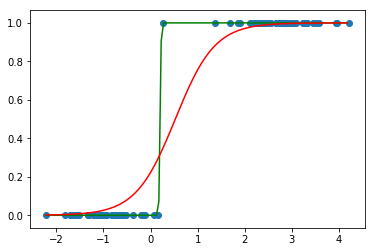

In [6]:
model_sep_no_reg = LogisticRegression(C=C).fit(df[['x2']], df['y'])
model_sep_reg = LogisticRegression().fit(df[['x2']], df['y'])

x_range = np.arange(df['x2'].min(), df['x2'].max(), 0.05)
y_range_no_reg = model_sep_no_reg.predict_proba(x_range.reshape(-1,1))[:,1]
y_range_reg = model_sep_reg.predict_proba(x_range.reshape(-1,1))[:,1]

print(model_sep_no_reg.intercept_, model_sep_no_reg.coef_)
print(model_sep_reg.intercept_, model_sep_reg.coef_)

plt.scatter(df['x2'], df['y'])
plt.plot(x_range, y_range_no_reg, c='green')
plt.plot(x_range, y_range_reg, c='red')
plt.show()

# Reducing variance of models

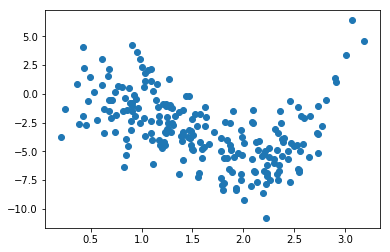

In [7]:
x = np.arange(0.5, 2.7, 0.01)
x += 0.3 * np.random.randn(*x.shape)
y_true = x ** 4 - 3 * x**3 + 5 * np.tan(x / 5) 
y = y_true + 2*np.random.randn(*y_true.shape)
plt.scatter(x, y)
plt.show()

C:\Users\nicho\Miniconda3\envs\mlearn\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.4217503807027564e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


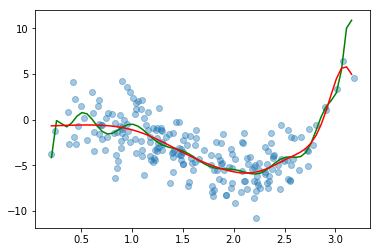

In [9]:
df = pd.DataFrame(x, columns=['x'])
def extend_dataframe(df, n):
    for i in range(2, n + 1):
        df['x^' + str(i)] = df['x']**i

N = 20        

extend_dataframe(df, N)
        
model_no_reg = LinearRegression().fit(df, y)
model_reg = Ridge().fit(df, y)

x_range = pd.DataFrame(np.arange(df['x'].min(), df['x'].max(), 0.05), columns=['x'])
extend_dataframe(x_range, N)
y_range_no_reg = model_no_reg.predict(x_range)
y_range_reg = model_reg.predict(x_range)

plt.scatter(df['x'], y, alpha=0.4)
plt.plot(x_range['x'], y_range_no_reg, color='green')
plt.plot(x_range['x'], y_range_reg, color='red')
plt.show()

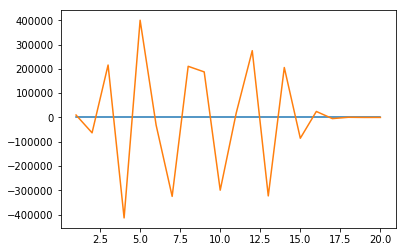

In [12]:
plt.plot(np.arange(1, N + 1, 1), model_reg.coef_)
plt.plot(np.arange(1, N + 1, 1), model_no_reg.coef_)
plt.show()